In [2]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

In [3]:
all_variables = pd.read_csv('resources/all_data_final.csv')
all_variables.head()

,Unnamed: 0,Country,Year,Life Expectancy,Adult Mortality,Infant Deaths,Alcohol,Percentage Expenditure,Hepatitis B,Measles,...,Population,Thinness 1-19 Years,Thinness 5-9 Years,Income Composition Of Resources,Schooling,Fdi,Birth Per Woman,Water,Military,Status Developed
0,0,afghanistan,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,...,33736494.0,17.2,17.3,0.479,10.1,0.849679,4.80,61.5,0.993455,0
1,1,afghanistan,2014,59.9,271.0,64,0.01,73.523582,62.0,492,...,327582.0,17.5,17.5,0.476,10.0,0.209790,4.98,58.8,1.298013,0
2,2,afghanistan,2013,59.9,268.0,66,0.01,73.219243,64.0,430,...,31731688.0,17.7,17.7,0.470,9.9,0.234965,5.17,56.2,1.076950,0
3,3,afghanistan,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,...,3696958.0,17.9,18.0,0.463,9.8,0.284095,5.38,53.5,1.175417,0
4,4,afghanistan,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,...,2978599.0,18.2,18.2,0.454,9.5,0.293039,5.60,50.9,1.821346,0


In [4]:
all_variables.count()

Unnamed: 0                         1362
Country                            1362
Year                               1362
Life Expectancy                    1362
Adult Mortality                    1362
Infant Deaths                      1362
Alcohol                            1362
Percentage Expenditure             1362
Hepatitis B                        1362
Measles                            1362
 Bmi                               1362
Under-Five Deaths                  1362
Polio                              1362
Total Expenditure                  1362
Diphtheria                         1362
 Hiv/Aids                          1362
Gdp                                1362
Population                         1362
 Thinness  1-19 Years              1362
 Thinness 5-9 Years                1362
Income Composition Of Resources    1362
Schooling                          1362
Fdi                                1362
Birth Per Woman                    1362
Water                              1362


# Random Forest Socioeconomic & Health Variable Model

In [5]:
model_vars = all_variables.drop(columns=['Country', 'Year', 'Unnamed: 0', 'Adult Mortality','Infant Deaths', 'Under-Five Deaths ',\
                                        ' Hiv/Aids', 'Measles ','Total Expenditure', ' Thinness 5-9 Years', 'Polio',\
                                        'Diphtheria ', 'Hepatitis B'])
#declare x and y variables
X = model_vars.drop(columns=['Life Expectancy'])
y = model_vars['Life Expectancy'].values.reshape(-1, 1)
print(X.shape, y.shape)


(1362, 13) (1362, 1)


In [6]:
#split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)

#use a random forest regressor model. Fit the model with the train data.
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train_scaled, y_train_scaled.ravel())

#Score the model with the test data
rf.score(X_test_scaled, y_test_scaled)

0.9396674412085468

In [7]:
#Display the feature importance of each x variable
feature_names = X.columns
features = sorted(zip(rf.feature_importances_, feature_names), reverse=True)

features

[(0.6144030939925118, 'Water'),
 (0.17380891909846, 'Income Composition Of Resources'),
 (0.05377823066534084, 'Birth Per Woman'),
 (0.05271870011323911, 'Alcohol'),
 (0.030233512381121697, ' Thinness  1-19 Years'),
 (0.018937337771002344, 'Military'),
 (0.015275779579824572, ' Bmi '),
 (0.010460093248009157, 'Schooling'),
 (0.008907466291910035, 'Fdi'),
 (0.0073098108190003865, 'Percentage Expenditure'),
 (0.00699721022903435, 'Gdp'),
 (0.006889206106735415, 'Population'),
 (0.0002806397038102891, 'Status Developed')]

In [8]:
#create a dataframe of the feature importances
feature_df = pd.DataFrame.from_records(features, columns =['feature_importance', 'variables']) 
feature_df.sort_values('feature_importance',inplace=True)

feature_df

,feature_importance,variables
12,0.000281,Status Developed
11,0.006889,Population
10,0.006997,Gdp
9,0.007310,Percentage Expenditure
8,0.008907,Fdi
7,0.010460,Schooling
6,0.015276,Bmi
5,0.018937,Military
4,0.030234,Thinness 1-19 Years
3,0.052719,Alcohol


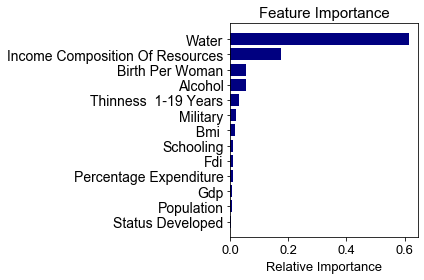

In [9]:
ax = plt.subplot(1,1,1)
ax.barh(feature_df['variables'], feature_df['feature_importance'], color='navy' )
plt.title('Feature Importance', fontsize=15)
plt.xlabel('Relative Importance', fontsize=13)

plt.yticks(fontsize=14)
plt.xticks(fontsize=13)
plt.style.use('seaborn')

plt.tight_layout()

sns.set(font_scale=1)
plt.savefig('images/features.png')
plt.show()

In [10]:
corr = model_vars.corr()
corr

,Life Expectancy,Alcohol,Percentage Expenditure,Bmi,Gdp,Population,Thinness 1-19 Years,Income Composition Of Resources,Schooling,Fdi,Birth Per Woman,Water,Military,Status Developed
Life Expectancy,1.000000,0.424602,0.412498,0.572736,0.445018,-0.035213,-0.497171,0.806214,0.739957,0.117346,-0.789355,0.794633,-0.021060,0.448808
Alcohol,0.424602,1.000000,0.414573,0.374208,0.431307,-0.064222,-0.430418,0.574397,0.620082,0.076447,-0.491153,0.460605,-0.137080,0.616435
Percentage Expenditure,0.412498,0.414573,1.000000,0.257010,0.959534,-0.025463,-0.272457,0.436977,0.427002,0.072578,-0.285032,0.299652,-0.082033,0.450036
Bmi,0.572736,0.374208,0.257010,1.000000,0.277775,-0.101286,-0.511827,0.583590,0.573578,0.117822,-0.545428,0.554937,0.019894,0.320752
Gdp,0.445018,0.431307,0.959534,0.277775,1.000000,-0.032579,-0.293110,0.480689,0.469813,0.098741,-0.320077,0.341905,-0.053029,0.472269
Population,-0.035213,-0.064222,-0.025463,-0.101286,-0.032579,1.000000,0.329837,-0.048114,-0.066166,-0.042148,0.002027,0.002407,0.022105,-0.048231
Thinness 1-19 Years,-0.497171,-0.430418,-0.272457,-0.511827,-0.293110,0.329837,1.000000,-0.505240,-0.513218,-0.111792,0.407175,-0.380585,0.112013,-0.328988
Income Composition Of Resources,0.806214,0.574397,0.436977,0.583590,0.480689,-0.048114,-0.505240,1.000000,0.844179,0.106311,-0.771627,0.799491,-0.092140,0.504453
Schooling,0.739957,0.620082,0.427002,0.573578,0.469813,-0.066166,-0.513218,0.844179,1.000000,0.079273,-0.752993,0.749023,-0.054896,0.519588
Fdi,0.117346,0.076447,0.072578,0.117822,0.098741,-0.042148,-0.111792,0.106311,0.079273,1.000000,-0.098678,0.085324,-0.055458,0.214197


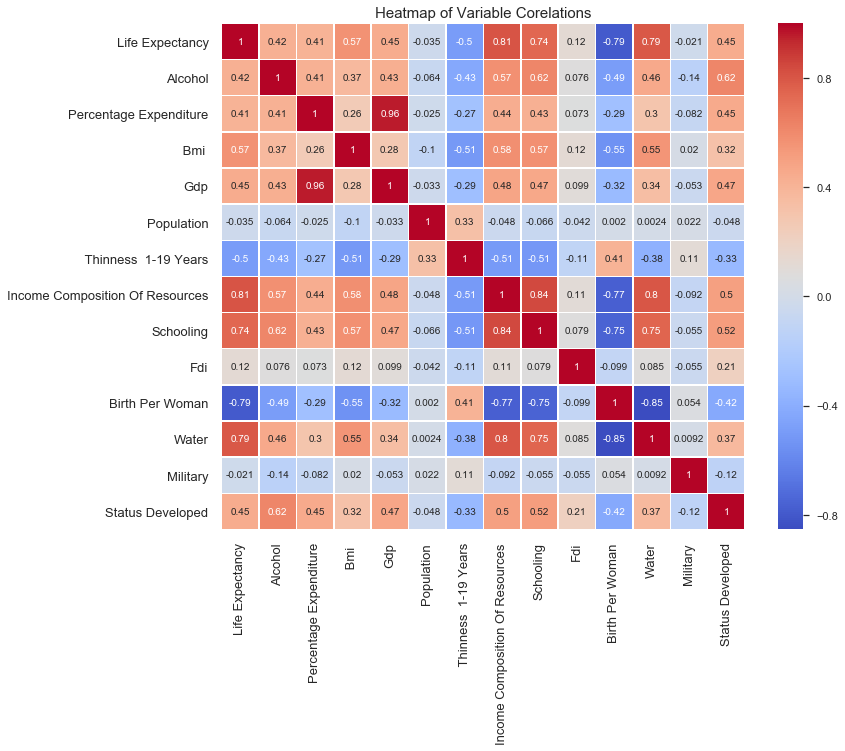

In [11]:
f, ax = plt.subplots(figsize=(12, 10))
sns.heatmap(corr, annot=True, linewidths=.5, ax=ax, annot_kws={"fontsize":10}, fmt='.2g',\
            cmap='coolwarm')
plt.tight_layout()
plt.title('Heatmap of Variable Corelations', fontsize=15)

plt.yticks(fontsize=13)
plt.xticks(fontsize=13)

#fix cut off of heatmap by adding spacing to bottom and top (fix found here https://github.com/mwaskom/seaborn/issues/1773)
bottom, top = plt.ylim() 
bottom += 0.5 
top -= 0.5 
plt.ylim(bottom, top)
plt.savefig('images/heatmap.png')
plt.show() 

# Random Forest Mortality Rate Variable Model

In [12]:
#select only variables to be used in model
mortality_cols = ['Life Expectancy', 'Adult Mortality', 'Under-Five Deaths ', ' Hiv/Aids']

mortality_model = all_variables[mortality_cols].copy()



mortality_model.head()

,Life Expectancy,Adult Mortality,Under-Five Deaths,Hiv/Aids
0,65.0,263.0,83,0.1
1,59.9,271.0,86,0.1
2,59.9,268.0,89,0.1
3,59.5,272.0,93,0.1
4,59.2,275.0,97,0.1


In [13]:
#declare x and y variables
X_2 = mortality_model[[ 'Adult Mortality', 'Under-Five Deaths ', ' Hiv/Aids']]
y_2 = mortality_model['Life Expectancy'].values.reshape(-1, 1)
print(X.shape, y.shape)

(1362, 13) (1362, 1)


In [14]:
#split data into train and test groups
X_train, X_test, y_train, y_test = train_test_split(X_2, y_2, random_state=42)

X_scaler = StandardScaler().fit(X_train)
y_scaler = StandardScaler().fit(y_train)

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)
y_train_scaled = y_scaler.transform(y_train)
y_test_scaled = y_scaler.transform(y_test)


#use a random forest regressor model. Fit the model with the train data.
rf = RandomForestRegressor(n_estimators=200)
rf = rf.fit(X_train, y_train.ravel())

#Score the model with the test data
rf.score(X_test, y_test.ravel())

0.9331846359662836

In [15]:
#Display the feature importance of each x variable
feature_names_m = X_2.columns
features_m = sorted(zip(rf.feature_importances_, feature_names_m), reverse=True)

features_m

[(0.4686149507554998, ' Hiv/Aids'),
 (0.42843023974279165, 'Adult Mortality'),
 (0.10295480950170849, 'Under-Five Deaths ')]

In [16]:
#create a dataframe of the feature importances
feature_m_df = pd.DataFrame.from_records(features_m, columns =['feature_importance', 'variables']) 
feature_m_df.sort_values('feature_importance',inplace=True)

feature_m_df

,feature_importance,variables
2,0.102955,Under-Five Deaths
1,0.428430,Adult Mortality
0,0.468615,Hiv/Aids


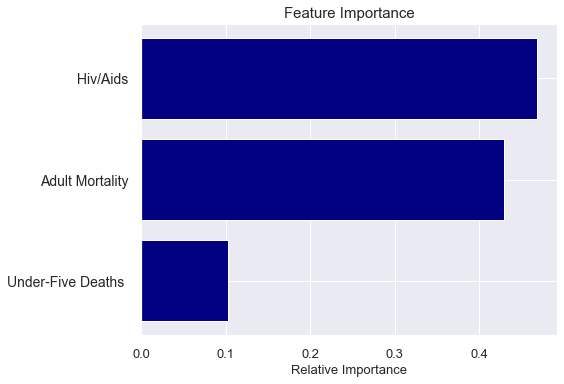

In [17]:
ax = plt.subplot(1,1,1)
ax.barh(feature_m_df['variables'], feature_m_df['feature_importance'], color='navy' )
plt.title('Feature Importance', fontsize=15)
plt.xlabel('Relative Importance', fontsize=13)
plt.style.use('seaborn')

plt.yticks(fontsize=14)
plt.xticks(fontsize=13)

plt.tight_layout()
plt.savefig('images/mortality_features.png')
plt.show()

In [18]:
m_corr = mortality_model.corr()
m_corr

,Life Expectancy,Adult Mortality,Under-Five Deaths,Hiv/Aids
Life Expectancy,1.000000,-0.731296,-0.215590,-0.616306
Adult Mortality,-0.731296,1.000000,0.067993,0.644074
Under-Five Deaths,-0.215590,0.067993,1.000000,0.030612
Hiv/Aids,-0.616306,0.644074,0.030612,1.000000


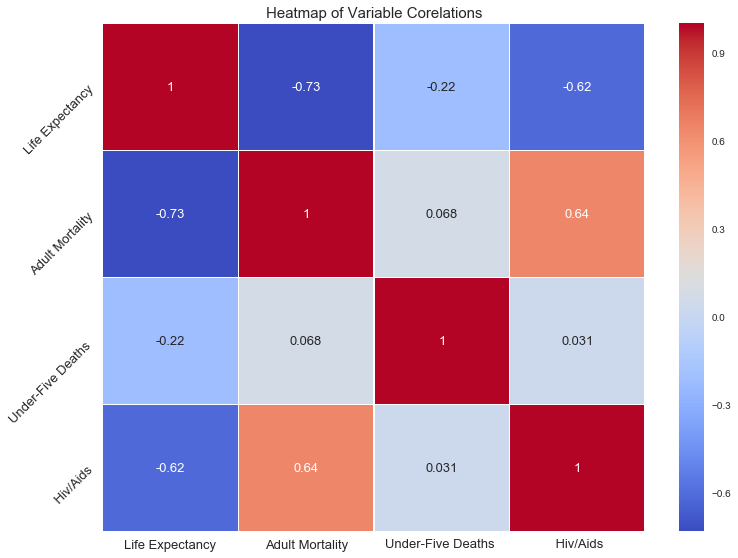

In [19]:
f, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(m_corr, annot=True, linewidths=.5, ax=ax, annot_kws={"fontsize":13}, fmt='.2g',\
            cmap='coolwarm')
plt.tight_layout()
plt.title('Heatmap of Variable Corelations', fontsize=15)

plt.yticks(fontsize=13, rotation=45)
plt.xticks(fontsize=13)

#fix cut off of heatmap by adding spacing to bottom and top (fix found here https://github.com/mwaskom/seaborn/issues/1773)
bottom, top = plt.ylim() 
bottom += 0.5 
top -= 0.5 
plt.ylim(bottom, top)
plt.savefig('images/mortality_heatmap.png')
plt.show() 